In [104]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib as mpl
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [3]:
df=pd.read_csv('churn.csv')
df.head(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


1. Построить гистограмму количества звонков в техническую поддержку

<AxesSubplot:>

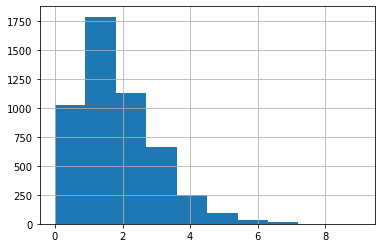

In [5]:
df['number_customer_service_calls'].hist()

Видно, что максимальное количество звонков превышает 1750.

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

<AxesSubplot:>

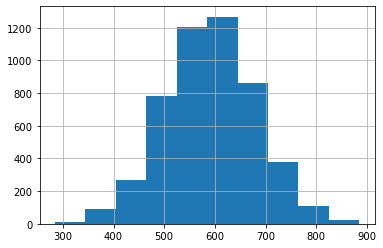

In [8]:
df['total']=df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['total'].hist()

Видно, что максимальное значение общей длительности звонков клиента превышает 1200.

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [73]:
x=df['total']
y=df['number_customer_service_calls']

def pearson(x,y):
    n=len(x)
    vals=range(n)

    sumx=sum([float(x[i]) for i in vals])
    sumy=sum([float(y[i]) for i in vals])

    sumxSq=sum([x[i]**2.0 for i in vals])
    sumySq=sum([y[i]**2.0 for i in vals])

    pSum=sum([x[i]*y[i] for i in vals])
  
    num=pSum-(sumx*sumy/n)
    d=((sumxSq-pow(sumx,2)/n)*(sumySq-pow(sumy,2)/n))**.5
    if d==0: return 0
    r=num/d
    return r
pearson(x,y)

-0.011407910827491027

Отрицательный близкий к нулю коэффициент говорит о слабой обратной зависимости между общим количеством минут и количеством звонков в техподдержку.

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

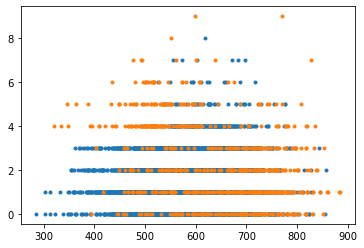

In [9]:
x = df[(df.churned==False)]['total']
y = df[(df.churned==False)]['number_customer_service_calls']
x1 = df[(df.churned==True)]['total']
y1 = df[(df.churned==True)]['number_customer_service_calls']
plt.scatter(x, y, marker='.')
plt.scatter(x1, y1, marker='.')

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [74]:
df_sort=df.sort_values(by='total',ascending=False)
df_sort['total'].head(5)

985     885.0
289     882.2
3205    860.2
4991    858.2
4271    857.4
Name: total, dtype: float64

In [75]:
df_sort['total'].tail(5)

992     313.3
1986    313.0
3779    303.2
1233    301.5
648     284.3
Name: total, dtype: float64

6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [90]:
states = list(set(df.state))
print('Доля оттока клиентов:')
for state in states:
    print(state, df[(df.state==state)&(df.churned==True)].value_counts()[1]/len(df[df.state==state]) * 100)



Доля оттока клиентов:
IN 1.0204081632653061
TX 0.8620689655172413
AL 0.8064516129032258
CA 1.9230769230769231
NM 1.098901098901099
UT 0.8928571428571428
DE 1.0638297872340425
CO 1.0416666666666665
VA 0.847457627118644
FL 1.1111111111111112
OR 0.8771929824561403
AR 1.0869565217391304
WA 1.0204081632653061
SC 1.098901098901099
KS 1.0101010101010102
ID 0.8403361344537815
GA 1.2048192771084338
IL 1.1363636363636365
OK 1.1111111111111112
AK 1.3888888888888888
WY 0.8695652173913043
CT 1.0101010101010102
NC 1.098901098901099
ME 0.9708737864077669
WV 0.6329113924050633
TN 1.1235955056179776
KY 1.0101010101010102
NV 1.1111111111111112
MD 0.9803921568627451
PA 1.2987012987012987
MA 0.9708737864077669
MS 1.0101010101010102
AZ 1.1235955056179776
SD 1.1764705882352942
MO 1.0752688172043012
NH 1.0526315789473684
WI 0.9433962264150944
NJ 0.8928571428571428
NY 0.8771929824561403
MT 1.0101010101010102
NE 1.1363636363636365
DC 1.1363636363636365
OH 0.8620689655172413
VT 0.9900990099009901
MI 0.970873786

In [27]:
print('Средняя стоимость минуты дневного времени разговора:')
for state in states:
    print(state, sum(df[(df.state == state)].total_day_minutes/df[(df.state == state)].total_day_charge)/df[df.state == state].count().values[0])

Средняя стоимость минуты дневного времени разговора:
IN 5.882368730324359
TX 5.882253369022192
AL 5.882306886943272
CA 5.882232069345985
NM 5.88229867912705
UT 5.88227837942326
DE 5.882174649471953
CO 5.8822666877314616
VA 5.882253352425479
FL 5.882308448889017
OR 5.882042045146291
AR 5.882259856280462
WA 5.882295117153955
SC 5.88207945556178
KS 5.882256614740531
ID 5.882239365363155
GA 5.882254301795718
IL 5.882222520461389
OK 5.882621266455478
AK 5.882300379592248
WY 5.882239936593007
CT 5.882295627575001
NC 5.88247962440689
ME 5.882118957633023
WV 5.882181770443847
TN 5.8821966188216575
KY 5.882075868201109
NV 5.882250442493118
MD 5.882233181391869
PA 5.882241191476624
MA 5.882364814562752
MS 5.882220421276362
AZ 5.882288117669897
SD nan
MO 5.882092171802528
NH 5.882204467955354
WI 5.88239802976838
NJ 5.882321140510802
NY 5.882226174852966
MT 5.882333027748264
NE 5.882252522193042
DC 5.882056548769627
OH 5.882074380386846
VT nan
MI 5.882257666995782
ND 5.882107433638188
RI 5.8821977

7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [91]:
pd.get_dummies(df['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [92]:
#df.columns
df_2=df
df_2=df_2.drop (columns = ['phone_number', 'area_code','international_plan','voice_mail_plan','total', 'state'])
df_2.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
df_2.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [93]:
X, y = df_2[['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls','total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes','total_intl_calls', 'total_intl_charge','number_customer_service_calls']], df_2['churned']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
X_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
386,99,0,146.7,64,24.94,274.0,99,23.29,321.3,98,14.46,8.9,1,2.40,3
4402,111,0,177.1,102,30.11,249.1,102,21.17,153.3,66,6.90,8.8,4,2.38,2
248,94,0,181.8,85,30.91,202.4,98,17.20,245.9,97,11.07,9.2,2,2.48,4
2084,136,24,174.6,76,29.68,176.6,114,15.01,214.4,91,9.65,8.8,5,2.38,2
2739,101,9,160.1,116,27.22,210.0,121,17.85,139.1,65,6.26,10.8,9,2.92,0


In [96]:
y_train.head()

386     False
4402    False
248     False
2084    False
2739    False
Name: churned, dtype: bool

9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas (в случае спарка - не надо)

In [97]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
X_train

array([[-0.02750465, -0.56320113, -0.63234569, ..., -1.39551055,
        -0.50022188,  1.09326287],
       [ 0.27426061, -0.56320113, -0.07057971, ..., -0.18351615,
        -0.5271414 ,  0.32471252],
       [-0.15324017, -0.56320113,  0.01627227, ..., -0.99151242,
        -0.3925438 ,  1.86181321],
       ...,
       [-1.20941858,  1.44723424,  0.49118628, ..., -0.58751428,
        -0.16372789,  0.32471252],
       [ 0.32455482, -0.56320113,  0.238022  , ...,  0.62448011,
         0.11892707, -0.44383782],
       [-2.24044989,  2.2663005 ,  0.53368831, ...,  1.02847825,
        -1.18666964, -0.44383782]])

In [99]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [100]:
X_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,-0.027505,-0.563201,-0.632346,-1.829929,-0.632299,1.465104,-0.057660,1.465062,2.383198,-0.091371,2.383768,-0.495482,-1.395511,-0.500222,1.093263
1,0.274261,-0.563201,-0.070580,0.093023,-0.070313,0.973112,0.092398,0.972253,-0.937921,-1.697887,-0.937306,-0.531820,-0.183516,-0.527141,0.324713
2,-0.153240,-0.563201,0.016272,-0.767245,0.016648,0.050381,-0.107679,0.049398,0.892648,-0.141574,0.894556,-0.386467,-0.991512,-0.392544,1.861813
3,0.902938,1.223853,-0.116778,-1.222681,-0.117055,-0.459393,0.692628,-0.459683,0.269938,-0.442796,0.270756,-0.531820,0.220482,-0.527141,0.324713
4,0.022790,0.106944,-0.384725,0.801479,-0.384460,0.200547,1.042762,0.200495,-1.218635,-1.748091,-1.218455,0.194946,1.836475,0.199686,-1.212388


10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [105]:
logistic = LogisticRegression()

In [106]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [107]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
svc_model=SVC()

In [109]:
svc_model.fit(X_train, y_train)

SVC()

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [111]:
accuracy_score(y_test, logistic.predict(X_test))

0.88

In [112]:
precision_score(y_test, logistic.predict(X_test))

0.64

In [113]:
recall_score(y_test, logistic.predict(X_test))

0.12598425196850394

In [114]:
f1_score(y_test, logistic.predict(X_test))

0.21052631578947367

In [115]:
accuracy_score(y_test, tree.predict(X_test))

0.882

In [116]:
precision_score(y_test, tree.predict(X_test))

0.5314685314685315

In [117]:
recall_score(y_test, tree.predict(X_test))

0.5984251968503937

In [118]:
f1_score(y_test, tree.predict(X_test))

0.5629629629629629

In [119]:
accuracy_score(y_test, svc_model.predict(X_test))

0.924

In [120]:
precision_score(y_test, svc_model.predict(X_test))

0.9322033898305084

In [121]:
recall_score(y_test, svc_model.predict(X_test))

0.4330708661417323

In [122]:
f1_score(y_test, svc_model.predict(X_test))

0.5913978494623656